<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/Multivariate_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Multivariate Exploration Pattern Language
 ## Color Palettes

In [1]:

# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
pokemon = pd.read_csv(path + 'pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


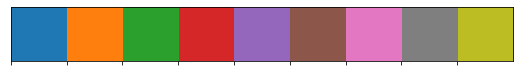

In [2]:
sns.palplot(sns.color_palette(n_colors=9)) # Qualitative, also deep, pastel, dark, muted, bright, colorblind

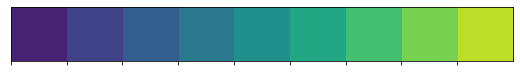

In [3]:
sns.palplot(sns.color_palette('viridis', 9)) # Sequential, also rocket, mako

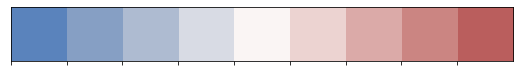

In [4]:
sns.palplot(sns.color_palette('vlag', 9)) # Diverging, also icefire

# Pokémon Exploration
**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

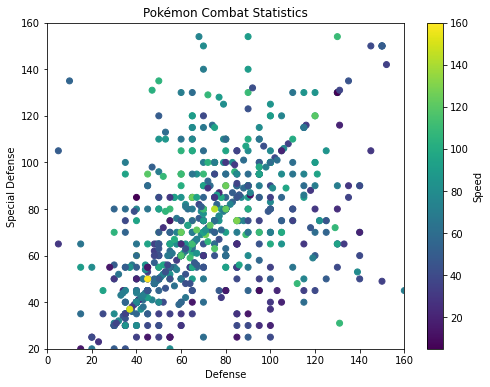

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed')
cbar = plt.colorbar()
plt.xlim(0,160)
plt.ylim(20,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')
cbar.ax.set_ylabel('Speed')
plt.title('Pokémon Combat Statistics')
plt.show()

We see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [6]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

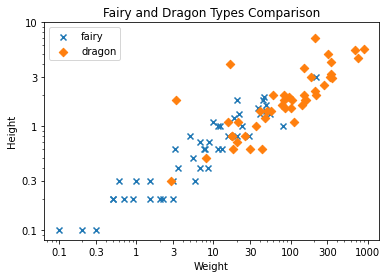

In [7]:
type_markers = [['fairy', 'x'], ['dragon', 'D']]
for ptype, marker in type_markers:
  df_type = pkmn_types.loc[pkmn_types['type'] == ptype]
  plt.scatter(data=df_type, x='weight', y='height', marker=marker)

# Set log scales for x and y axes
plt.xscale('log')
plt.yscale('log')

# Set the tick and labels
xticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
xticklables = [str(tick) for tick in xticks]
plt.xticks(xticks, xticklables)
yticks = [0.1, 0.3, 1, 3, 10]
yticklables = [str(tick) for tick in yticks]
plt.yticks(yticks, yticklables)

# Annotate the plot
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Fairy and Dragon Types Comparison')
plt.legend(['fairy', 'dragon'])
plt.show()

The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

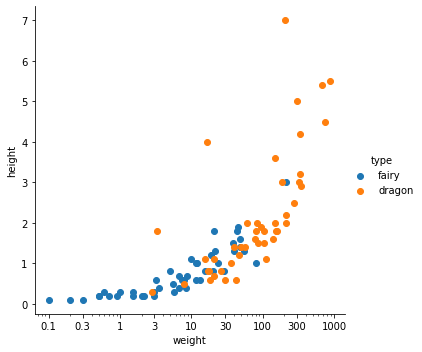

In [8]:
# Another solution
type_cols = ['type_1','type_2']
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
# plotting
g = sns.FacetGrid(data=pokemon_sub, hue='type', height=5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()
plt.show()